# grafik performa Penjualan
https://public.tableau.com/app/profile/dendy.dwinanda/viz/GrafikPerformaPenjualan/User_Divisi_Penjualan?publish=yes

# katalog buyer
https://public.tableau.com/app/profile/dendy.dwinanda/viz/KatalogBuyer/Dashboard2?publish=yes

In [1]:
'''
=================================================
MILESTONE 01 PHASE 0

Nama  : Dendy Dwinanda
Batch : RMT-030

Program ini dibuat untuk melakukan automatisasi pengolahan (cleaning) data text yang berguna untuk pemodelan model analisa penjualan mobil.
=================================================
'''

'\n=================================================\nMILESTONE 01 PHASE 0\n\nNama  : Dendy Dwinanda\nBatch : RMT-030\n\nProgram ini dibuat untuk melakukan automatisasi pengolahan (cleaning) data text yang berguna untuk pemodelan model analisa penjualan mobil.\n=================================================\n'

Topik Permasalahan = menganalisis trend penjualan mobil pada tahun 2015

Problem Statement = meningkatkan penjualan mobil pada tahun berikutnya berdasarkan analisis trend 2015

Penjabaran =
- berapa penjualan mobil tahun 2015?
- berapa keuntungan perusahaan berdasarkan penjualan mobil selama tahun 2015?
- apa merk yang disukai konsumen pada tahun 2015?
- apa jenis body mobil yang di sukai konsumen 2015?
- bagaimana hubungan antara kondisi mobil dengan penjualan dan potensi keuntungan? (jawaban menggunakan analisis deskriptif)
- apakah penjualan top 5 merek mobil menguasai total pendapatan? (jawaban menggunakan statistik inferensial)


In [2]:
#mengimport library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu

In [3]:
#memuat data csv penjualan
#sumber data = https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data/data
data = pd.read_csv("car_prices.csv")
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


DATA CLEANING

In [4]:
#membuang data yang memuat missing value
data_cleaned = data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472325 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 61.3+ MB


In [5]:
#merubah data type saledate menjadi date time
data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], utc=True)

#mengambil data year kedalam kolom year
data_cleaned['year_date'] = data_cleaned['saledate'].dt.year

#mengambil data month kedalam kolom month
data_cleaned['month_date'] = data_cleaned['saledate'].dt.month

#membuat kolom yang berisi selisih antara harga jual dan harga pasar
data_cleaned['potensial_loss'] = data_cleaned['sellingprice'] - data_cleaned['mmr']

#membuat karakter data pada body menjadi lowercase
data_cleaned['body'] = data_cleaned['body'].str.lower()

#menghapus kolom yang tidak diperlukan
data_cleaned.drop('vin', axis=1, inplace=True)


C:\Users\dwina\AppData\Local\Temp\ipykernel_19696\4270489655.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], utc=True)
C:\Users\dwina\AppData\Local\Temp\ipykernel_19696\4270489655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], utc=True)
C:\Users\dwina\AppData\Local\Temp\ipykernel_19696\4270489655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

ANALISIS DESKRIPTIF

In [6]:
#mengambil data dengan tahun penjualan 2015
data_2015 = data_cleaned[data_cleaned['year_date']==2015]

data_2015.to_csv('data_milestone_final.csv', index=False)
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435536 entries, 2 to 558836
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   year            435536 non-null  int64              
 1   make            435536 non-null  object             
 2   model           435536 non-null  object             
 3   trim            435536 non-null  object             
 4   body            435536 non-null  object             
 5   transmission    435536 non-null  object             
 6   state           435536 non-null  object             
 7   condition       435536 non-null  float64            
 8   odometer        435536 non-null  float64            
 9   color           435536 non-null  object             
 10  interior        435536 non-null  object             
 11  seller          435536 non-null  object             
 12  mmr             435536 non-null  float64            
 13  sellingprice    435

In [7]:
data_2015.describe()

,year,condition,odometer,mmr,sellingprice,year_date,month_date,potensial_loss
count,435536.000000,435536.000000,435536.000000,435536.000000,435536.000000,435536.0,435536.000000,435536.000000
mean,2010.260477,30.842364,66297.508736,13913.086863,13773.022203,2015.0,2.916599,-140.064661
std,3.806379,13.278017,51714.757578,9526.274413,9607.898380,0.0,1.906383,1748.283675
min,1990.000000,1.000000,1.000000,25.000000,1.000000,2015.0,1.000000,-87750.000000
25%,2008.000000,24.000000,28023.750000,7550.000000,7300.000000,2015.0,1.000000,-800.000000
50%,2012.000000,35.000000,50585.000000,12400.000000,12300.000000,2015.0,2.000000,-50.000000
75%,2013.000000,42.000000,95915.000000,18350.000000,18300.000000,2015.0,5.000000,650.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000,2015.0,7.000000,207200.000000


In [8]:
#mencari measurement of sentral tendency dari kolom condition
condition_mean = data_2015['condition'].mean()
condition_median = data_2015['condition'].median()
condition_mode = data_2015['condition'].mode().values[0]
condition_skew = data_2015['condition'].skew()
condition_std = data_2015['condition'].std()

print(f'Dari data kondisi mobil didapat rata-rata kondisi pada nilai {condition_mean}')
print(f'Dari data kondisi mobil didapat nilai tengah kondisi pada nilai {condition_median}')
print(f'Dari data kondisi mobil didapat nilai yang sering muncul kondisi pada nilai {condition_mode}')
print(f'Dari data kondisi mobil didapat kemiringan data pada nilai {condition_skew}')
print(f'Dari data kondisi mobil didapat standar deviasi pada nilai {condition_std}')

Dari data kondisi mobil didapat rata-rata kondisi pada nilai 30.842364351052495
Dari data kondisi mobil didapat nilai tengah kondisi pada nilai 35.0
Dari data kondisi mobil didapat nilai yang sering muncul kondisi pada nilai 19.0
Dari data kondisi mobil didapat kemiringan data pada nilai -0.8491854417452956
Dari data kondisi mobil didapat standar deviasi pada nilai 13.278017075796898


Berdasarkan data kondisi mobil diatas menunjukan nilai rata-rata mobil yang terjual pada 30.842364351052495 dari skala 0 sampai 50. Dengan nilai tengah kondisi mobil pada pada 35.0 dan modus dari data kondisi berada pada nilai 19.0 dari skala 0 sampai 50.0. Skewness bernilai -0.8491854417452956 memiliki arti bahwa data memliki ekor lebih panjang di sisi kiri kurva sehingga terdapat banyak kondisi mobil yang nilainya dibawah rata-rata nilai kondisi (kemiringan data bernilai negatif). Nilai standar deviasi 13.278017075796898 merupakan nilai persebaran data dimana nilai persebaran data mendekati dari nilai rata-rata dari persebaran data.

In [9]:
#mencari measurement of sentral tendency dari kolom selling price
selling_price_mean = data_2015['sellingprice'].mean()
selling_price_median = data_2015['sellingprice'].median()
selling_price_mode = data_2015['sellingprice'].mode().values[0]
selling_price_skew = data_2015['sellingprice'].skew()
selling_price_std = data_2015['sellingprice'].std()

print(f'Dari data selling price mobil didapat rata-rata nilai {selling_price_mean}')
print(f'Dari data selling price mobil didapat nilai tengah pada nilai {selling_price_median}')
print(f'Dari data selling price mobil didapat mode dengan nilai {selling_price_mode}')
print(f'Dari data selling price mobil didapat kemiringan data pada nilai {selling_price_skew}')
print(f'Dari data selling price mobil didapat standar deviasi pada nilai {selling_price_std}')

Dari data selling price mobil didapat rata-rata nilai 13773.02220252746
Dari data selling price mobil didapat nilai tengah pada nilai 12300.0
Dari data selling price mobil didapat mode dengan nilai 12000.0
Dari data selling price mobil didapat kemiringan data pada nilai 1.9925946987681482
Dari data selling price mobil didapat standar deviasi pada nilai 9607.898379847464


Berdasarkan data selling price mobil diatas menunjukan nilai rata-rata mobil yang terjual pada 13773.02220252746. Dengan nilai tengah selling price mobil pada pada 12300.0 dan modus dari data seliing price berada pada nilai 12000.0. Skewness bernilai 1.9925946987681482 memiliki arti bahwa data memliki ekor lebih panjang di sisi kanan kurva sehingga nilai selling price yang diminati konsumen berada di bawah rata-rata harga mobil yang terjual (kemiringan kurva bernilai positif). Nilai standar deviasi 9607.898379847464 merupakan nilai persebaran data dimana nilai persebaran data mendekati dari nilai rata-rata persebaran data.

In [10]:
#mencari measurement of sentral tendency dari kolom potensial loss
potensial_loss_mean = data_2015['potensial_loss'].mean()
potensial_loss_median = data_2015['potensial_loss'].median()
potensial_loss_mode = data_2015['potensial_loss'].mode().values[0]
potensial_loss_skew = data_2015['potensial_loss'].skew()
potensial_loss_std = data_2015['potensial_loss'].std()


print(f'Dari data potensial loss mobil didapat rata-rata nilai {potensial_loss_mean}')
print(f'Dari data potensial loss mobil didapat nilai tengah pada nilai {potensial_loss_median}')
print(f'Dari data potensial loss mobil didapat mode dengan nilai {potensial_loss_mode}')
print(f'Dari data potensial loss mobil didapat kemiringan data pada nilai {potensial_loss_skew}')
print(f'Dari data potensial loss mobil didapat standar deviasi pada nilai {potensial_loss_std}')

Dari data potensial loss mobil didapat rata-rata nilai -140.06466055618824
Dari data potensial loss mobil didapat nilai tengah pada nilai -50.0
Dari data potensial loss mobil didapat mode dengan nilai 0.0
Dari data potensial loss mobil didapat kemiringan data pada nilai 3.0091029398341482
Dari data potensial loss mobil didapat standar deviasi pada nilai 1748.2836745912339


Berdasarkan data potensial loss mobil diatas menunjukan nilai rata-rata potensial loss pada -140.06466055618824. Dengan nilai tengah potensial loss mobil pada pada -50.0 dan modus dari data potensial loss berada pada nilai 0.0.0. Skewness bernilai 3.0091029398341482 memiliki arti bahwa data memliki kemiringan kurva yang negatif yang artinya banyak data yang memiliki potensial los yang banyak. Nilai standar deviasi 1748.2836745912339 merupakan nilai persebaran data dimana nilai persebaran data melebihi dari nilai rata-rata sehinggal perseberan data potensial loss luas.

rho-correlation: 0.47, p-value: 0.0


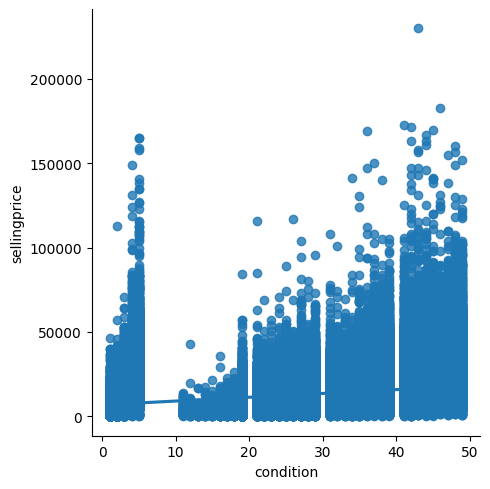

In [11]:
#melihat korelasi kondisi mobil dengan selling price

#grafik korelasi antara kondisi dengan selling price
sns.lmplot(data=data_2015,x='condition', y='sellingprice')

#mencari nilai korelasi dan p-value dari kondisi dan selling price
corr_rho, pval_s = stats.spearmanr(data_2015['condition'], data_2015['sellingprice'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: 0.66, p-value: 0.0


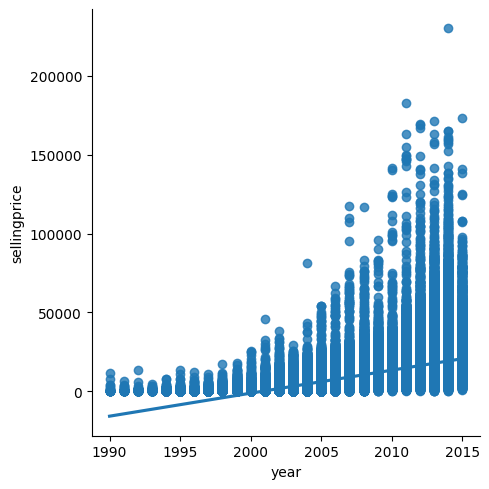

In [21]:
#melihat korelasi kondisi mobil dengan selling price

#grafik korelasi antara kondisi dengan selling price
sns.lmplot(data=data_2015,x='year', y='sellingprice')

#mencari nilai korelasi dan p-value dari kondisi dan selling price
corr_rho, pval_s = stats.spearmanr(data_2015['year'], data_2015['sellingprice'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.70, p-value: 0.0


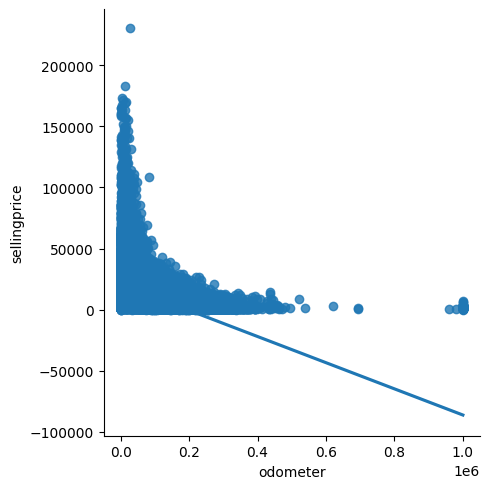

In [24]:
#melihat korelasi kondisi mobil dengan selling price

#grafik korelasi antara kondisi dengan selling price
sns.lmplot(data=data_2015,x='odometer', y='sellingprice')

#mencari nilai korelasi dan p-value dari kondisi dan selling price
corr_rho, pval_s = stats.spearmanr(data_2015['odometer'], data_2015['sellingprice'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Dari korelasi antara kondisi mobil dengan selling price menunjukan bahwa ada korelasi positif dengan kata lain semakin baik kondisi mobil meningkatkan harga jual mobil.

rho-correlation: 0.30, p-value: 0.0


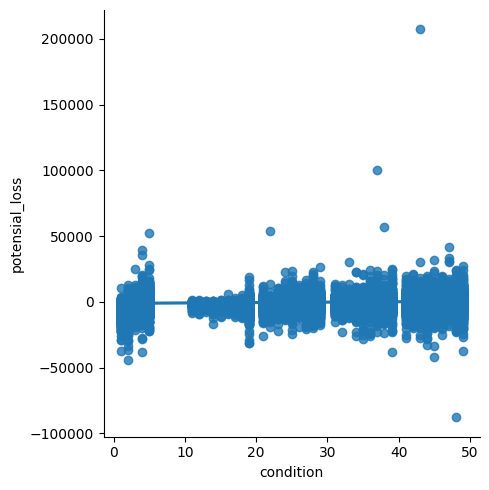

In [12]:
#melihat korelasi antara kondisi mobil dengan potensial loss

#grafik korelasi antara kondisi dengan potensial loss
sns.lmplot(data=data_2015,x='condition', y='potensial_loss')

#mencari nilai korelasi dan p-value dari kondisi dan potensial loss
corr_rho, pval_s = stats.spearmanr(data_2015['condition'], data_2015['potensial_loss'])
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Dari korelasi antara kondisi mobil dengan potensial loss menunjukan bahwa ada korelasi positif dengan kata lain semakin baik kondisi mobil meningkatkan potensial loss dari penjualan mobil.

STATISTIK INFERENSIAL

In [13]:
#menghitung jumlah penjualan mobil berdasarkan merk
data_2015['make'].value_counts()

#membuat list kosong untuk menampung nilai top 5 dan not top 5
ranking_make = []

#memasukan top 5 selling produk dan not top 5 selling produk
for make in data_2015['make']:
    if make in ['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge']:
        ranking_make.append('top_5')
    else :
        ranking_make.append('not_top_5')

data_2015['ranking_penjualan'] = ranking_make

C:\Users\dwina\AppData\Local\Temp\ipykernel_19696\2481191208.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['ranking_penjualan'] = ranking_make


In [14]:
#mengelompokan brand menjadi top 5 brand dan non top 5 brand untuk membandingkan hasil pendapatan dari kedua kategori
top_5 = data_2015[data_2015['ranking_penjualan']=='top_5']['sellingprice'].sum()
not_top_5 = data_2015[data_2015['ranking_penjualan']=='not_top_5']['sellingprice'].sum()

hipotesis pengujian =
-H0 = top 5 brand menguasai total pendapatan
-H1 = top 5 brand tidak menguasai total pendapatan

In [15]:
# Non-parametrik test method mannwhitneyu
statistic, p_value = mannwhitneyu(top_5, not_top_5)
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)

Mann-Whitney U test statistic: 0.0
p-value: 1.0


In [16]:
#melihat pendapatan dari top 5 brand dan non top 5 brand
pendapatan_top_5 = data_2015[data_2015['ranking_penjualan']=='top_5']['sellingprice'].sum()
pendapatan_non_top_5 = not_top_5 = data_2015[data_2015['ranking_penjualan']=='not_top_5']['sellingprice'].sum()
print(f'pendapatan top 5 brand ada pada angka :{pendapatan_top_5}')
print(f'pendapatan non top 5 brand ada pada angka :{pendapatan_non_top_5}')

pendapatan top 5 brand ada pada angka :2893562481.0
pendapatan non top 5 brand ada pada angka :3105084517.0


Dari pengujian Non-parametrik test method mannwhitneyu menemukan hasil p-value dimana nilai p-value 1 yang berarti lebih dari 0.05 menunjukan bahwa H0 diterima. Diterimanya H0 menunjukan bahwa total pendapatan dari top_5 memiliki nilai penjualan yang mendominasi dari total penjualan. Walaupun nilai pendapatan kumulatif > non top 5 brand perlu diingat bahwa non top 5 terdiri dari lebih dari 20 brand, sehingga top 5 brand dikatakan mendominasi pasar

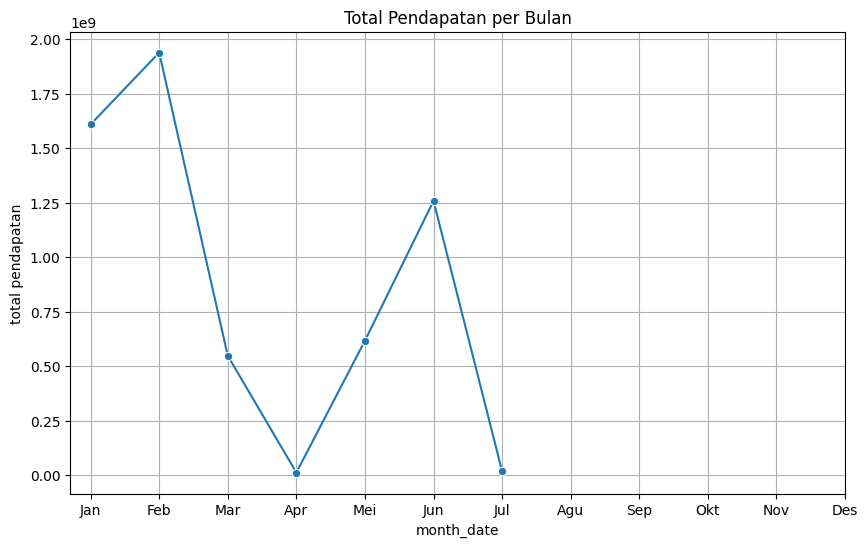

In [17]:
#menghitung pendapatan tiap bulan pada tahun 2015
monthly_revenue = data_2015.groupby('month_date')['sellingprice'].sum().reset_index()

#menggunakan line chart untuk menggambarkan pendapatan penjualan tiap bulan pada tahun 2015
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='month_date', y='sellingprice', marker='o')
plt.xlabel('month_date')
plt.ylabel('total pendapatan')
plt.title('Total Pendapatan per Bulan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

Dari grafik pendapatan diatas menunjukan bahwa pendapatan bulanan menunjukan trend penurunan dengan pendapatan tertinggi di bulan febuari dan pendapatan terendah di bulan april.

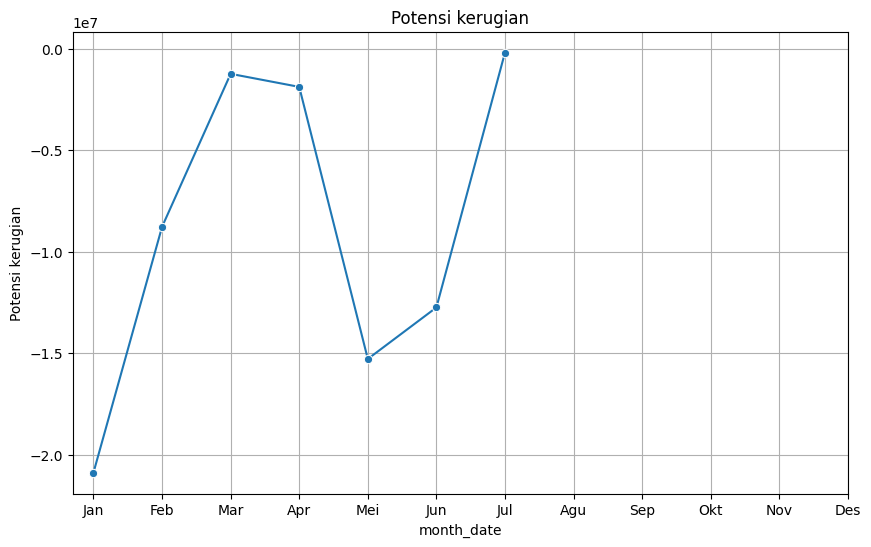

In [18]:
#menghitung potensial loss tiap bulan pada tahun 2015
monthly_revenue = data_2015.groupby('month_date')['potensial_loss'].sum().reset_index()

#menggunakan line chart untuk menggambarkan pendapatan penjualan tiap bulan pada tahun 2015
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_revenue, x='month_date', y='potensial_loss', marker='o')
plt.xlabel('month_date')
plt.ylabel('Potensi kerugian')
plt.title('Potensi kerugian')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True)
plt.show()

Dari grafik diatas menunjukan potensial loss terbesar ada pada bulan ke januari dimana trend penurunan potensi pendapatan terjadi pada bulan ke mei lalu membaik di bulan ke juni dan juli. Potensi loss pendapatan didapat dari selisih harga jual dengan harga pasar market mobil.

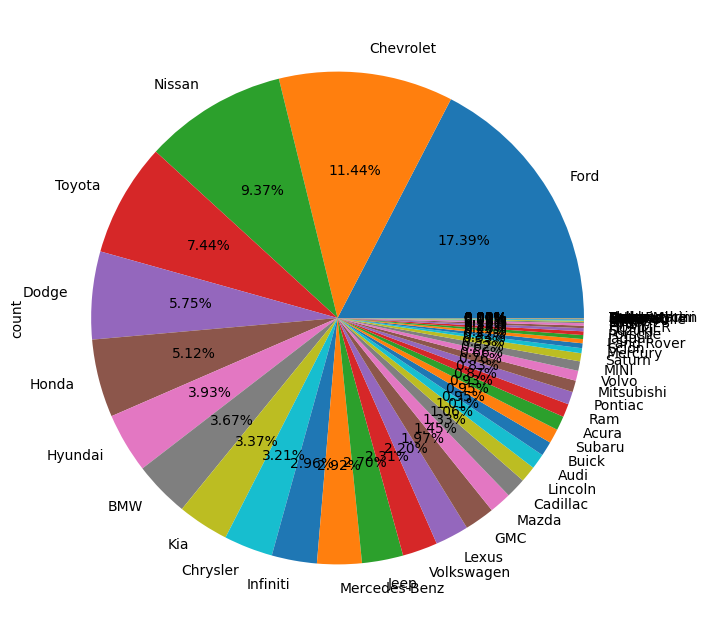

In [19]:
#perilaku konsumen dalam membeli berdasarkan merek mobil
data_2015['make'].value_counts().rank(ascending=False)

#menggunakan pie chart untuk menggambarkan proporsi merk yang dipilih konsumen pada tahun 2015
fig,ax1 = plt.subplots(figsize=(8,8))

data_2015['make'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Dari data pie chart diatas menunjukan bahwa konsumen banyak menyukai pabrikan ford di urutan pertama dengan 17.39% dan di urutan kedua ada chevrolet dengan 11.44%. pasar penjualan market didominasi oleh Ford, Chevrolet, Nissan, Toyota, dan Dodge dengan total 51.39% dari total penjualan.

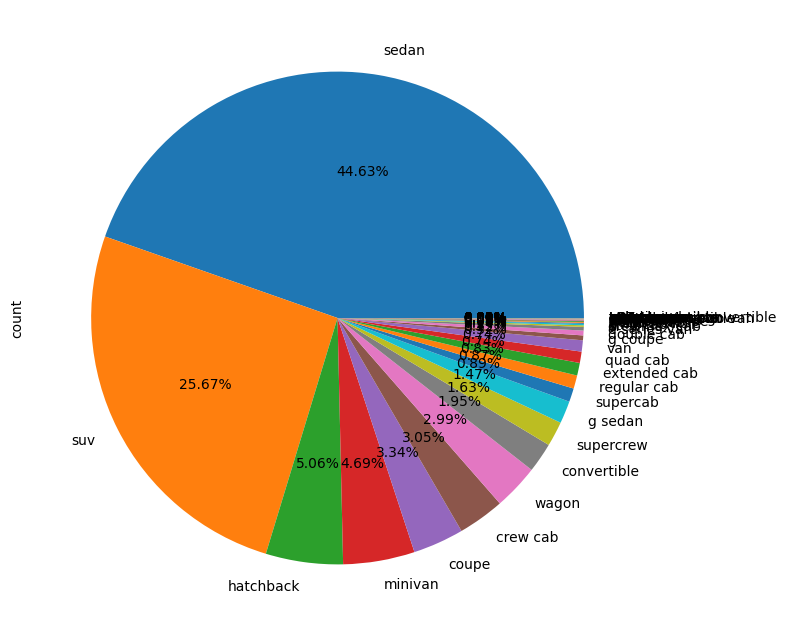

In [20]:
#perilaku konsumen dalam membeli berdasarkan merek mobil
data_2015['body'].value_counts().rank(ascending=False)

#menggunakan pie chart untuk menggambarkan proporsi body yang dipilih konsumen pada tahun 2015
fig,ax1 = plt.subplots(figsize=(8,8))

data_2015['body'].value_counts().plot(kind='pie', autopct='%.2f%%',ax=ax1)
plt.show()

Dari data diatas menunjukan bahwa konsumen menunjukan ketertarikan besar dengan mobil dengan body sedan dan SUV. Hal ini menunjukan peruntukan dan penggunakan mobil oleh konsumen.

Kesimpulan dari analisis ini adalah menunjukan analisis trend pendapatan perusahaan dari bulan januari sampai july 2015, dengan hasil pendapatan yang fluktuatif. Dari data yang ada menunjukan bahwa konsumen lebih gemar memilih pabrikan Ford sebesar 17.39% dari penjualan dan konsumen lebih gemar memilih bentuk mobil sedan dengan 44.63% dari total penjualan. Data hubungan antara kondisi mobil dengan harga penjualan berbading lurus sehingga disarankan mobil-mobil yang ada dilakukan perbaikan untuk mencapai standar rata-rata kondisi mobil karena dapat meningkatkan jumlah pendapatan. Analisis inferensial menunjukan proporsi antara top 5 brand dengan non top 5 brand dimana walaupun hasi p-value menunjukan bahwa H0 diterima, dengan begitu top 5 brand mendominasi penjualan dari total pendapatan.